In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
from spacepy import pycdf

In [33]:
def cdf_to_df(cdf,nameliste):
    df1=pd.DataFrame()
    df2=pd.DataFrame()
    for elem in nameliste:
        print (elem)
        data=[]
        index=[]
        for i in range(len(cdf[elem])):
            df=cdf[elem][i]
            for j in range (0,15):
#           print('j=',j)
                val=df[j]
#            print(val)
                data=data+[val]
                index=index+[i*16+j]
        if (elem=='GMT'):
                df1 = pd.DataFrame(data, index=index, columns=[elem])
        else:
                df2=pd.DataFrame(data, index=index, columns=[elem])
        df1=pd.concat([df1,df2],axis=1)
        df1['REF_FICHIER']=file_name
    return (df1)

In [34]:
def create_dfx(min,max,step):
    X_INTER=np.linspace(min,max,step)
    #print (X_INTER)
    dfx = pd.DataFrame(X_INTER, index=X_INTER, columns=['XP_TP_M'])
    return (dfx)

In [35]:
def interpolate_X (df,dfx,file_name):
    X_INTER = dfx["XP_TP_M"].tolist()
    df1=df.merge(dfx, how='outer',left_on='XP_TP_M', right_on='XP_TP_M').sort_values(by=['XP_TP_M'], inplace=False)
    df1 = df1.interpolate().reset_index() 
    df1=df1[df1.XP_TP_M.isin(X_INTER)]
    df1= df1.fillna({"REF_FICHIER":file_name})
    return (df1)

In [36]:
#filepath = "//Fr-vfiler117/V390_DATA_CADV/workgroup/NEXTT/MAMBA_JOB/XLR_SURV_PA/Resultats/M11000/V0227"
filepath='C:/Users/to09267/Documents/A321XLR/CDF_CERTIF'
liste_file=os.listdir(filepath)

In [37]:
print (liste_file)

['APP10M11000V0217.cdf', 'APP10M11000V0220.cdf', 'APP10M11000V0222.cdf', 'APP10M11000V0227.cdf', 'APP10M11000V0228.cdf', 'APP10M11000V0233.cdf', 'APP11M11000V0233.cdf', 'APP12M11000V0233.cdf', 'APP1M11000V0217.cdf', 'APP1M11000V0218.cdf', 'APP1M11000V0219.cdf', 'APP1M11000V0220.cdf', 'APP1M11000V0222.cdf', 'APP1M11000V0223.cdf', 'APP1M11000V0224.cdf', 'APP1M11000V0225.cdf', 'APP1M11000V0226.cdf', 'APP1M11000V0227.cdf', 'APP1M11000V0228.cdf', 'APP1M11000V0229.cdf', 'APP1M11000V0231.cdf', 'APP1M11000V0232.cdf', 'APP2M11000V0217.cdf', 'APP2M11000V0218.cdf', 'APP2M11000V0219.cdf', 'APP2M11000V0220.cdf', 'APP2M11000V0222.cdf', 'APP2M11000V0223.cdf', 'APP2M11000V0224.cdf', 'APP2M11000V0225.cdf', 'APP2M11000V0226.cdf', 'APP2M11000V0228.cdf', 'APP2M11000V0229.cdf', 'APP2M11000V0231.cdf', 'APP2M11000V0232.cdf', 'APP2M11000V0233.cdf', 'APP3M11000V0217.cdf', 'APP3M11000V0218.cdf', 'APP3M11000V0219.cdf', 'APP3M11000V0220.cdf', 'APP3M11000V0222.cdf', 'APP3M11000V0223.cdf', 'APP3M11000V0224.cdf', 'A

In [38]:
#liste_file=['APP10M11000V0217.cdf', 'APP1M11000V0217.cdf', 'APP2M11000V0217.cdf', 'APP3M11000V0217.cdf', 'APP4M11000V0217.cdf', 'APP5M11000V0217.cdf', 'APP6M11000V0217.cdf', 'APP7M11000V0217.cdf', 'APP8M11000V0217.cdf', 'APP9M11000V0217.cdf']
#liste_file=['APP10M11000V0220.cdf', 'APP1M11000V0220.cdf', 'APP2M11000V0220.cdf', 'APP3M11000V0220.cdf', 'APP4M11000V0220.cdf', 'APP5M11000V0220.cdf', 'APP6M11000V0220.cdf', 'APP7M11000V0220.cdf', 'APP8M11000V0220.cdf', 'APP9M11000V0220.cdf']
#liste_file=['APP1M11000V0219.cdf', 'APP2M11000V0219.cdf', 'APP3M11000V0219.cdf', 'APP4M11000V0219.cdf', 'APP5M11000V0219.cdf', 'APP6M11000V0219.cdf', 'APP7M11000V0219.cdf']
#liste_file=['APP1M11000V0218.cdf', 'APP2M11000V0218.cdf', 'APP3M11000V0218.cdf', 'APP4M11000V0218.cdf', 'APP5M11000V0218.cdf', 'APP6M11000V0218.cdf', 'APP7M11000V0218.cdf',]
#liste_file=['GA1M11000V0221.cdf', 'GA2M11000V0221.cdf', 'GA3M11000V0221.cdf', 'GA4M11000V0221.cdf', 'GA5M11000V0221.cdf', 'GA6M11000V0221.cdf']
#liste_file=['APP1M11000V0224.cdf', 'APP2M11000V0224.cdf', 'APP3M11000V0224.cdf', 'APP4M11000V0224.cdf', 'APP5M11000V0224.cdf', 'APP6M11000V0224.cdf']
#liste_file=['APP10M11000V0217.cdf', 'APP10M11000V0220.cdf', 'APP10M11000V0222.cdf', 'APP1M11000V0217.cdf', 'APP1M11000V0218.cdf', 'APP1M11000V0219.cdf', 'APP1M11000V0220.cdf', 'APP1M11000V0223.cdf', 'APP1M11000V0224.cdf', 'APP2M11000V0217.cdf', 'APP2M11000V0218.cdf', 'APP2M11000V0219.cdf', 'APP2M11000V0220.cdf', 'APP2M11000V0223.cdf', 'APP2M11000V0224.cdf', 'APP3M11000V0217.cdf', 'APP3M11000V0218.cdf', 'APP3M11000V0219.cdf', 'APP3M11000V0220.cdf', 'APP3M11000V0223.cdf',  'APP4M11000V0217.cdf', 'APP4M11000V0218.cdf', 'APP4M11000V0219.cdf', 'APP4M11000V0220.cdf', 'APP4M11000V0223.cdf', 'APP4M11000V0224.cdf', 'APP5M11000V0217.cdf', 'APP5M11000V0218.cdf', 'APP5M11000V0219.cdf', 'APP5M11000V0220.cdf',  'APP5M11000V0223.cdf', 'APP5M11000V0224.cdf', 'APP6M11000V0217.cdf', 'APP6M11000V0218.cdf', 'APP6M11000V0220.cdf', 'APP6M11000V0222.cdf', 'APP6M11000V0223.cdf', 'APP6M11000V0224.cdf', 'APP7M11000V0217.cdf', 'APP7M11000V0218.cdf', 'APP7M11000V0220.cdf', 'APP7M11000V0222.cdf', 'APP7M11000V0224.cdf', 'APP8M11000V0217.cdf', 'APP8M11000V0220.cdf', 'APP8M11000V0222.cdf', 'APP9M11000V0217.cdf', 'APP9M11000V0220.cdf', 'APP9M11000V0222.cdf']
#APP3M11000V0224.cdf', supprimmé car trop court
#'APP5M11000V0222.cdf', car vent à 9999
#liste_file=['APP1M11000V0225.cdf', 'APP2M11000V0225.cdf', 'APP3M11000V0225.cdf', 'APP4M11000V0225.cdf', 'APP5M11000V0225.cdf', 'APP6M11000V0225.cdf']
#liste_file=['APP1M11000V0226.cdf', 'APP2M11000V0226.cdf', 'APP3M11000V0226.cdf', 'APP4M11000V0226.cdf', 'APP5M11000V0226.cdf', 'APP6M11000V0226.cdf', 'APP7M11000V0226.cdf']
#liste_file=['APP10M11000V0227.cdf', 'APP1M11000V0227.cdf', 'APP2M11000V0227.cdf', 'APP3M11000V0227.cdf', 'APP4M11000V0227.cdf', 'APP5M11000V0227.cdf', 'APP6M11000V0227.cdf', 'APP7M11000V0227.cdf', 'APP8M11000V0227.cdf', 'APP9M11000V0227.cdf']
liste_file=['APP10M11000V0217.cdf', 'APP10M11000V0220.cdf', 'APP10M11000V0222.cdf', 'APP10M11000V0227.cdf', 'APP10M11000V0228.cdf', 'APP10M11000V0233.cdf', 'APP11M11000V0233.cdf', 'APP12M11000V0233.cdf', 'APP1M11000V0217.cdf', 'APP1M11000V0218.cdf', 'APP1M11000V0219.cdf', 'APP1M11000V0220.cdf', 'APP1M11000V0222.cdf', 'APP1M11000V0223.cdf', 'APP1M11000V0224.cdf', 'APP1M11000V0225.cdf', 'APP1M11000V0226.cdf', 'APP1M11000V0227.cdf', 'APP1M11000V0228.cdf', 'APP1M11000V0229.cdf', 'APP1M11000V0231.cdf', 'APP1M11000V0232.cdf', 'APP2M11000V0217.cdf', 'APP2M11000V0218.cdf', 'APP2M11000V0219.cdf', 'APP2M11000V0220.cdf', 'APP2M11000V0222.cdf', 'APP2M11000V0223.cdf', 'APP2M11000V0224.cdf', 'APP2M11000V0225.cdf', 'APP2M11000V0226.cdf', 'APP2M11000V0228.cdf', 'APP2M11000V0229.cdf', 'APP2M11000V0231.cdf', 'APP2M11000V0232.cdf', 'APP2M11000V0233.cdf', 'APP3M11000V0217.cdf', 'APP3M11000V0218.cdf', 'APP3M11000V0219.cdf', 'APP3M11000V0220.cdf', 'APP3M11000V0222.cdf', 'APP3M11000V0223.cdf', 'APP3M11000V0224.cdf', 'APP3M11000V0225.cdf', 'APP3M11000V0226.cdf', 'APP3M11000V0228.cdf', 'APP3M11000V0229.cdf', 'APP3M11000V0231.cdf', 'APP3M11000V0232.cdf', 'APP3M11000V0233.cdf', 'APP4M11000V0217.cdf', 'APP4M11000V0218.cdf', 'APP4M11000V0219.cdf', 'APP4M11000V0220.cdf', 'APP4M11000V0222.cdf', 'APP4M11000V0223.cdf', 'APP4M11000V0224.cdf', 'APP4M11000V0225.cdf', 'APP4M11000V0226.cdf', 'APP4M11000V0228.cdf', 'APP4M11000V0229.cdf', 'APP4M11000V0231.cdf', 'APP4M11000V0232.cdf', 'APP4M11000V0233.cdf', 'APP5M11000V0217.cdf', 'APP5M11000V0218.cdf', 'APP5M11000V0219.cdf', 'APP5M11000V0220.cdf', 'APP5M11000V0222.cdf', 'APP5M11000V0223.cdf', 'APP5M11000V0224.cdf', 'APP5M11000V0225.cdf', 'APP5M11000V0226.cdf', 'APP5M11000V0227.cdf', 'APP5M11000V0228.cdf', 'APP5M11000V0229.cdf', 'APP5M11000V0231.cdf', 'APP5M11000V0232.cdf', 'APP5M11000V0233.cdf', 'APP6M11000V0217.cdf', 'APP6M11000V0218.cdf', 'APP6M11000V0220.cdf', 'APP6M11000V0222.cdf', 'APP6M11000V0223.cdf', 'APP6M11000V0224.cdf', 'APP6M11000V0225.cdf', 'APP6M11000V0226.cdf', 'APP6M11000V0227.cdf', 'APP6M11000V0228.cdf', 'APP6M11000V0233.cdf', 'APP7M11000V0217.cdf', 'APP7M11000V0218.cdf', 'APP7M11000V0220.cdf', 'APP7M11000V0222.cdf', 'APP7M11000V0224.cdf', 'APP7M11000V0226.cdf', 'APP7M11000V0227.cdf', 'APP7M11000V0228.cdf', 'APP7M11000V0233.cdf', 'APP8M11000V0217.cdf', 'APP8M11000V0220.cdf', 'APP8M11000V0222.cdf', 'APP8M11000V0227.cdf', 'APP8M11000V0228.cdf', 'APP8M11000V0233.cdf', 'APP9M11000V0217.cdf', 'APP9M11000V0220.cdf', 'APP9M11000V0222.cdf', 'APP9M11000V0227.cdf', 'APP9M11000V0228.cdf', 'APP9M11000V0233.cdf']

In [39]:
dico=pd.read_csv(os.path.join('C:/Users/to09267/Documents/A321XLR/CDF_CERTIF/definition/CDF_V9.csv'),sep=',',header=(0))

In [40]:
dico.tail()

,PARAM_NB,MNEMO,RANK
335,VE_TP_M,VE_TP_M,331.0
336,SFSELXLR_FGFTI1,LEVCONF_FGFTI1,332.0
337,SFSELXLR_FGFTI2,LEVCONF_FGFTI2,333.0
338,LOCHDGER_IMPACT,LOCHDGER_IMPACT,334.0
339,RUDPOSDEG_E1M2,RUDPOSDEG_E1M2,335.0


In [41]:
#d = dict([(i, [a, b]) for i, a, b in zip(df["Name"], df["Age"], df["Course"])])
d=dict([(a,b) for  a,b in zip(dico.PARAM_NB, dico.MNEMO)])


In [42]:
print (d)

{'SYRDPC_S2C5': 'SPR2ORDER_SEC', 'SYLDPC_S2C5': 'SPL2ORDER_SEC', 'SXRDPC_S2C5': 'SPR5ORDER_SEC', 'SXLDPC_S2C5': 'SPL5ORDER_SEC', 'DPEQUISYS_E1C9': 'DPEQUI_1', 'DQEQUISYS_E1C9': 'DQEQUI_1', 'DREQUISYS_E1C9': 'DREQUI_1', 'BAPCTL_E1C8': 'BAPCTL_1', 'BAP1CTL_E1C3': 'BAP1CTL_1', 'BAP2CTLNC_E1C4': 'BAP2CTL_1', 'BFLARECL_E1C3': 'BFLARECL_1', 'BNOSEDOWNCL_E1C3': 'BNOSEDOWNCL_1', 'BTOGACL_E1C3': 'BTOGACL_1', 'BSOL_E1C2': 'BGROUNDLAW_1', 'BXTPESTLT0_E1C3': 'BXTPESTLT0_1', 'BF1ENG_E1C3': 'BF1ENG_1', 'ACWGT_E1C3': 'ACWGT_1', 'ACCG_E1C7': 'ACCG_1', 'SFCONF_E1C3': 'SFCONF_1', 'WXEST_E1C3': 'WXEST_1', 'ALPHAF_E1C3': 'ALPHAF_1', '27E101513-': 'SLATPOS_1', 'FLAPPOS_E1C3': 'FLAPPOS_1', 'PHI_E1C3': 'PHI_1', 'ZSTD_S1C4': 'ZSTD_1', 'P1F_E1C3': 'P1F_1', 'Q1F_E1C3': 'Q1F_1', 'R1F_E1C3': 'R1F_1', 'THETA_E1C3': 'THETA_1', 'NZLAW_E1C3': 'NZLAW_1', 'NZEQUI_E1C3': 'NZEQUI_1', 'NZCOM_E1C3': 'NZCOM_1', 'DNZCAP_E1C3': 'DNZCAP_1', 'DNZCAPFLARE_E1C3': 'DNZCAPFLARE_1', 'DNZCAPGS_E1C3': 'DNZCAPGS_1', 'XFLARECALC_E1C8': 

In [43]:
file_name='APP1M11000V0227.cdf'
cdf = pycdf.CDF(os.path.join(filepath, file_name))

In [44]:
name_list=[]
for key in cdf.keys():
    name_list=name_list+[key]
print(name_list)

['GMT', 'SYRDPC_S2C5', 'SYLDPC_S2C5', 'SXRDPC_S2C5', 'SXLDPC_S2C5', 'DPEQUISYS_E1C9', 'DQEQUISYS_E1C9', 'DREQUISYS_E1C9', 'BAPCTL_E1C8', 'BAP1CTL_E1C3', 'BAP2CTLNC_E1C4', 'BFLARECL_E1C3', 'BNOSEDOWNCL_E1C3', 'BTOGACL_E1C3', 'BSOL_E1C2', 'BXTPESTLT0_E1C3', 'BF1ENG_E1C3', 'ACWGT_E1C3', 'ACCG_E1C7', 'SFCONF_E1C3', 'WXEST_E1C3', 'ALPHAF_E1C3', '27E101513-', 'FLAPPOS_E1C3', 'PHI_E1C3', 'ZSTD_S1C4', 'P1F_E1C3', 'Q1F_E1C3', 'R1F_E1C3', 'THETA_E1C3', 'NZLAW_E1C3', 'NZEQUI_E1C3', 'NZCOM_E1C3', 'DNZCAP_E1C3', 'DNZCAPFLARE_E1C3', 'DNZCAPGS_E1C3', 'XFLARECALC_E1C8', 'HMLGESTL_E1C5', 'XHRA_E1C4', 'XHRA_E1M4', 'VZTERRAIN_E1C8', 'VZTPMEMFLARE_E1C3', 'VZESTFLARE_E1C3', 'VZFLAREC_E1C3', 'VZINERT_E1C3', 'ELEVMPOSLAW_E1C7', 'THSPOSLAW_E1C7', 'AILLORDER_E1C9', 'AILRORDER_E1C9', 'DQDERCOMPMOTNZ_E1C3', 'NY1F_E1C3', 'SSLIPESTDR_E1C7', 'DREQNOR_E1C3', 'NZRATE_E1C3', 'PHICAP_E1C3', 'NZCFLARENX_E1C3', 'PCOMAP_E1C3', 'PCOM_E1C3', 'SSLIPCAP_E1C7', 'PNEUTRAL_E1C3', 'SSLIPNEUTRAL_E1C3', 'DQDERCOMPAPFLAR_E1C3', 'ALP

In [45]:
#nameliste=['XP_TP_M','YP_TP_M','ZP_TP_M','BRELIEF_RA1',"BRELIEF_RA2",'BLOC_XLS','BGLD_XLS','L173_DEV_LOC_MA_1','L174_GS_DEV_MA_1','XHRA_E1C4','HMLGEST_E1C3','HMLGESTL_E1C5',
#          'ACWGT_E1C3', 'ACCG_E1C7','ACWGT_E2C3', 'ACCG_E2C7','CAAF', 'MASSE_T',
#          'VZI_TD', 'AUTOBRAKE', 'XTP_IMPACT', 'YTP_IMPACT',
#          'P1F_E2C3', 'Q1F_E2C3', 'R1F_E2C3', 'THETA_E2C3',
#           'FLAPPOS_E1C3','WXP_M', 'WYP_M', 'WZP_M',
#           'IGXXAAF', 'IGYYAAF', 'IGZZAAF', 'IGXZAAF']
    
nameliste=name_list

In [46]:
#recherche des noms équivalents dans le dictionnaire
newliste=[]
oldliste=['22G1350GG-', '22G1350GG-', '22G10240I-', '22G20240I-', '22G10160G-', '22G20160G-', '22G10170G-', '22G20170G-', '27E10100C-', '27E121003-', '27E20100C-', '27E221003-', '27E107203-', '27E10720C-', '27E207203-', '27E20720C-', '27E107003-', '27E10700C-', '27E207003-', '27E20700C-',]
for key in oldliste:
    print (key, d[key])
    newliste=newliste+[d[key]]
print (newliste)

22G1350GG- BVTGTCHANGE_2
22G1350GG- BVTGTCHANGE_2
22G10240I- TURBLVLDET_1
22G20240I- TURBLVLDET_2
22G10160G- SPDTGTAT_1
22G20160G- SPDTGTAT_2
22G10170G- SPDTGTOFFSET_1
22G20170G- SPDTGTOFFSET_2
27E10100C- NX1_E1M3
27E121003- NX1_E1C3
27E20100C- NX1_E2M3
27E221003- NX1_E2C3
27E107203- NZ1F_E1C3
27E10720C- NZ1F_E1M3
27E207203- NZ1F_E2C3
27E20720C- NZ1F_E2M3
27E107003- NY1F_E1C3
27E10700C- NY1F_E1M3
27E207003- NY1F_E2C3
27E20700C- NY1F_E2M3
['BVTGTCHANGE_2', 'BVTGTCHANGE_2', 'TURBLVLDET_1', 'TURBLVLDET_2', 'SPDTGTAT_1', 'SPDTGTAT_2', 'SPDTGTOFFSET_1', 'SPDTGTOFFSET_2', 'NX1_E1M3', 'NX1_E1C3', 'NX1_E2M3', 'NX1_E2C3', 'NZ1F_E1C3', 'NZ1F_E1M3', 'NZ1F_E2C3', 'NZ1F_E2M3', 'NY1F_E1C3', 'NY1F_E1M3', 'NY1F_E2C3', 'NY1F_E2M3']


In [47]:
dico_conversion=dict([(a,b) for  a,b in zip(oldliste, newliste)])
print(dico_conversion)

{'22G1350GG-': 'BVTGTCHANGE_2', '22G10240I-': 'TURBLVLDET_1', '22G20240I-': 'TURBLVLDET_2', '22G10160G-': 'SPDTGTAT_1', '22G20160G-': 'SPDTGTAT_2', '22G10170G-': 'SPDTGTOFFSET_1', '22G20170G-': 'SPDTGTOFFSET_2', '27E10100C-': 'NX1_E1M3', '27E121003-': 'NX1_E1C3', '27E20100C-': 'NX1_E2M3', '27E221003-': 'NX1_E2C3', '27E107203-': 'NZ1F_E1C3', '27E10720C-': 'NZ1F_E1M3', '27E207203-': 'NZ1F_E2C3', '27E20720C-': 'NZ1F_E2M3', '27E107003-': 'NY1F_E1C3', '27E10700C-': 'NY1F_E1M3', '27E207003-': 'NY1F_E2C3', '27E20700C-': 'NY1F_E2M3'}


In [48]:
#creation du dataframe avec les abcisses normalisées pour pouvoir faire du multiplot
min=-15000
max=3000
step=100
dfx=create_dfx(min,max,step)

In [17]:
data_agg=pd.DataFrame()
for file in liste_file:
    file_name=file
    print (file_name)
    cdf = pycdf.CDF(os.path.join(filepath, file_name))
    dataframe=cdf_to_df(cdf,nameliste)
    df=dataframe[(dataframe.XHRA_E1C4<5000)&((dataframe.XP_TP_M>-15000)&(dataframe.XP_TP_M<3000)&(dataframe.YP_TP_M<500)&(dataframe.YP_TP_M>-500))]
    data=interpolate_X(dataframe,dfx,file_name)
    data_agg=pd.concat([data_agg,data],axis=0)
    cdf.close()
    

APP10M11000V0217.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLO

SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP10M11000V0222.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZC

VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-

BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
S

XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2

VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
B

MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3

DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTAS

SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_

VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP1M11000V0227.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERR

SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSEL

MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15

AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_F

DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOC

LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZT

NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTAS

BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1

L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP2M11000V0229.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELE

BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP2M11000V0232.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_

FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
32220

SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
Z

BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANT

XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLI

DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC

BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANT

VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP3M11000V0231.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C

896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP3M11000V0233.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1C

YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV

ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC

ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2


DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3

PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BA

BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANT

BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP4M11000V0232.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQ

896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP5M11000V0217.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4

VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
M

NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FG

BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1A

DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2

PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E

BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_F

ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP5M11000V0232.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3

896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP6M11000V0217.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL

TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA

DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF

WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGF

PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHI

RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPEST

PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG

22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP7M11000V0220.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7

IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP7M11000V0224.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C

ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BE

ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
8

ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_

ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCF

ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3

ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGF

22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP9M11000V0222.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
P

IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP9M11000V0228.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_

SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22

CDFError: NO_SUCH_CDF: The specified CDF does not exist.

In [49]:
print (nameliste)

['GMT', 'SYRDPC_S2C5', 'SYLDPC_S2C5', 'SXRDPC_S2C5', 'SXLDPC_S2C5', 'DPEQUISYS_E1C9', 'DQEQUISYS_E1C9', 'DREQUISYS_E1C9', 'BAPCTL_E1C8', 'BAP1CTL_E1C3', 'BAP2CTLNC_E1C4', 'BFLARECL_E1C3', 'BNOSEDOWNCL_E1C3', 'BTOGACL_E1C3', 'BSOL_E1C2', 'BXTPESTLT0_E1C3', 'BF1ENG_E1C3', 'ACWGT_E1C3', 'ACCG_E1C7', 'SFCONF_E1C3', 'WXEST_E1C3', 'ALPHAF_E1C3', '27E101513-', 'FLAPPOS_E1C3', 'PHI_E1C3', 'ZSTD_S1C4', 'P1F_E1C3', 'Q1F_E1C3', 'R1F_E1C3', 'THETA_E1C3', 'NZLAW_E1C3', 'NZEQUI_E1C3', 'NZCOM_E1C3', 'DNZCAP_E1C3', 'DNZCAPFLARE_E1C3', 'DNZCAPGS_E1C3', 'XFLARECALC_E1C8', 'HMLGESTL_E1C5', 'XHRA_E1C4', 'XHRA_E1M4', 'VZTERRAIN_E1C8', 'VZTPMEMFLARE_E1C3', 'VZESTFLARE_E1C3', 'VZFLAREC_E1C3', 'VZINERT_E1C3', 'ELEVMPOSLAW_E1C7', 'THSPOSLAW_E1C7', 'AILLORDER_E1C9', 'AILRORDER_E1C9', 'DQDERCOMPMOTNZ_E1C3', 'NY1F_E1C3', 'SSLIPESTDR_E1C7', 'DREQNOR_E1C3', 'NZRATE_E1C3', 'PHICAP_E1C3', 'NZCFLARENX_E1C3', 'PCOMAP_E1C3', 'PCOM_E1C3', 'SSLIPCAP_E1C7', 'PNEUTRAL_E1C3', 'SSLIPNEUTRAL_E1C3', 'DQDERCOMPAPFLAR_E1C3', 'ALP

In [50]:
#version raw sans interpolation
filepath='C:/Users/to09267/Documents/A321XLR/CDF_CERTIF'
data_agg_wo_inter=pd.DataFrame()
for file in liste_file:
    file_name=file
    print (file_name)
    cdf = pycdf.CDF(os.path.join(filepath, file_name))
    dataframe=cdf_to_df(cdf,nameliste)
    df=dataframe
#    df=dataframe[(dataframe.XHRA_E1C4<5000)&((dataframe.XP_TP_M>-15000)&(dataframe.XP_TP_M<3000)&(dataframe.YP_TP_M<500)&(dataframe.YP_TP_M>-500))]
#    data=interpolate_X(dataframe,dfx,file_name)
    data_agg_wo_inter=pd.concat([data_agg_wo_inter,df],axis=0)
    cdf.close()

APP10M11000V0217.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLO

SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP10M11000V0222.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFL

VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-

GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLS

SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FG

BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVR

XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLI

ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
B

ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_

22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP1M11000V0227.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP

896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP1M11000V0229.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3

ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BE

ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
8

PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG

SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3

ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27

DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURB

27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP2M11000V0229.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3

VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP2M11000V0232.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1

TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22

BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I

DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTAS

SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTR

VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C

NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFT

BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA

WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP3M11000V0233.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLA

3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M

DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_

NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTAS

BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA

VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C

AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBO

BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1A

L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP5M11000V0217.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER

BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP5M11000V0219.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S

VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5

DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTAS

SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTR

DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
E

SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FG

BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA

322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP6M11000V0217.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZES

DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP6M1100

DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_

DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG

BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA

DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2

NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FG

BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1A

MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP7M11000V0224.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_

DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP7M1100

LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_FGFTG2
VTASDOTBOOST_FGFTG2
VTASDOTHYBAT_FGFTG2
VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLS

AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTRK_FGA2
BGSTRK_FGB2
BLNDTRK_L146_FGA2
BLOCCPT_FGA2
BGSCL_FGFTG2
MACH_FGA2
SPDCMP_FGA2
SPDTGT_FGB2
N1TGT_FGA2
N1ACT_FGA2
GSDEVRL_FGB2
LOCDEVRL_FGFTG2
YLOCFPV_FGB2
VYLOCFPV_FGB2
HGSANTFX_FGFTG2
DZEST_FGFTG2
DVZGSC_FGB2
FPAGND_FGFTG2
FPAAER_FGA2
HDG_FGA2
TRK_FGA2
VGNDDOT_FGFTG2
YFM_FGFTG2
XFM1_FGFTG2
XFM2_FGFTG2
DNZCAPVS_FGFTI2
PITCHFD_FGA2
ROLLFD_FGA2
YAWBAR_FGA2
FPDLAT_FGA2
FPDLONG_FGA2
KTURBDET_FGFTG2
LOCHDGER_FGB2
SPDGNDRL_FGFTG2
YROUTFPV_FGB2
BFLARECL_FGB2
TLA_FGA2
VTASDOTHYB2_FGFTG2
VTASDOTHYBAT2_FGFTG2
VTASDOTHYBAP_FGFTI2
VTASDOTHYB5_FGFTI2
VTASDOTISOCAS_F

BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHRA_E2C4
XHRA_E2M4
VZTERRAIN_E2C8
VZTPMEMFLARE_E2C3
VZESTFLARE_E2C3
VZFLAREC_E2C3
VZINERT_E2C3
ELEVMPOSLAW_E2C7
THSPOSLAW_E2C7
AILLORDER_E2C9
AILRORDER_E2C9
DQDERCOMPMOTNZ_E2C3
NY1F_E2C3
SSLIPESTDR_E2C7
DREQNOR_E2C3
NZRATE_E2C3
PHICAP_E2C3
NZCFLARENX_E2C3
PCOMAP_E2C3
PCOM_E2C3
SSLIPCAP_E2C7
PNEUTRAL_E2C3
SSLIPNEUTRAL_E2C3
DQDERCOMPAPFLAR_E2C3
ALPHAPROT_E2C3
ALPHAMAX_E2C3
SSLIPTARGET_E2C3
RORDDEG_E2C6
SPCAP_E2C3
YROUTFC_FGB2
BE1LENG_E2C7
BE2LENG_E2C7
BROLLOUTCL_E2C3
ZFLARE_E2M3
HMLGEST_E2C3
NWHEELEMIL_E2C1
MEANTRK_FGFTG2
RWLOCDEV_FGFTG2
FTK099_FGFTG2
BLOCTR

N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VTASDOTHYB5_FGFTI1
VTASDOTISOCAS_FGFTG1
VTASDOTBOOST_FGFTG1
VTASDOTHYBAT_FGFTG1
VTASDOTISOM_FGFTG1
ALTBI_FGFTG1
SPDGND_FGFTG1
BATSEN_FGA1
SPDTAS_FGFTG1
DPEQUISYS_E2C9
DQEQUISYS_E2C9
DREQUISYS_E2C9
BAPCTL_E2C8
BAP1CTL_E2C3
BAP2CTLNC_E2C4
BFLARECL_E2C3
BNOSEDOWNCL_E2C3
BTOGACL_E2C3
BSOL_E2C2
BXTPESTLT0_E2C3
BF1ENG_E2C3
ACWGT_E2C3
ACCG_E2C7
SFCONF_E2C3
WXEST_E2C3
ALPHAF_E2C3
27E201513-
FLAPPOS_E2C3
PHI_E2C3
ZSTD_S2C4
P1F_E2C3
Q1F_E2C3
R1F_E2C3
THETA_E2C3
NZLAW_E2C3
NZEQUI_E2C3
NZCOM_E2C3
DNZCAP_E2C3
DNZCAPFLARE_E2C3
DNZCAPGS_E2C3
XFLARECALC_E2C8
HMLGESTL_E2C5
XHR

ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOCDEV_FGFTG1
FTK099_FGFTG1
MEANTRK_FGFTG1
BLOCTRK_FGA1
BGSTRK_FGB1
BLNDTRK_L146_FGA1
BLOCCPT_FGA1
BGSCL_FGFTG1
MACH_FGA1
SPDCMP_FGA1
SPDTGT_FGB1
N1TGT_FGA1
N1ACT_FGA1
GSDEVRL_FGB1
LOCDEVRL_FGFTG1
YLOCFPV_FGB1
VYLOCFPV_FGB1
HGSANTFX_FGFTG1
DZEST_FGFTG1
DVZGSC_FGB1
FPAGND_FGFTG1
FPAAER_FGA1
HDG_FGA1
TRK_FGA1
VGNDDOT_FGFTG1
YFM_FGFTG1
XFM1_FGFTG1
XFM2_FGFTG1
DNZCAPVS_FGFTI1
PITCHFD_FGA1
ROLLFD_FGA1
YAWBAR_FGA1
FPDLAT_FGA1
FPDLONG_FGA1
KTURBDET_FGFTG1
LOCHDGER_FGB1
SPDGNDRL_FGFTG1
YROUTFPV_FGB1
BFLARECL_FGB1
TLA_FGA1
VTASDOTHYB2_FGFTG1
VTASDOTHYBAT2_FGFTG1
VTASDOTHYBAP_FGFTI1
VT

APP9M11000V0222.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCAPGS_E1C3
XFLARECALC_E1C8
HMLGESTL_E1C5
XHRA_E1C4
XHRA_E1M4
VZTERRAIN_E1C8
VZTPMEMFLARE_E1C3
VZESTFLARE_E1C3
VZFLAREC_E1C3
VZINERT_E1C3
ELEVMPOSLAW_E1C7
THSPOSLAW_E1C7
AILLORDER_E1C9
AILRORDER_E1C9
DQDERCOMPMOTNZ_E1C3
NY1F_E1C3
SSLIPESTDR_E1C7
DREQNOR_E1C3
NZRATE_E1C3
PHICAP_E1C3
NZCFLARENX_E1C3
PCOMAP_E1C3
PCOM_E1C3
SSLIPCAP_E1C7
PNEUTRAL_E1C3
SSLIPNEUTRAL_E1C3
DQDERCOMPAPFLAR_E1C3
ALPHAPROT_E1C3
ALPHAMAX_E1C3
SSLIPTARGET_E1C3
RORDDEG_E1C6
YROUTFC_FGB1
BE1LENG_E1C7
BE2LENG_E1C7
SPCAP_E1C3
BROLLOUTCL_E1C3
ZFLARE_E1M3
HMLGEST_E1C3
NWHEELEMIL_E1C1
RWLOC

SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700C-
VE_TP_M
SFSELXLR_FGFTI1
SFSELXLR_FGFTI2
LOCHDGER_IMPACT
RUDPOSDEG_E1M2
APP9M11000V0228.cdf
GMT
SYRDPC_S2C5
SYLDPC_S2C5
SXRDPC_S2C5
SXLDPC_S2C5
DPEQUISYS_E1C9
DQEQUISYS_E1C9
DREQUISYS_E1C9
BAPCTL_E1C8
BAP1CTL_E1C3
BAP2CTLNC_E1C4
BFLARECL_E1C3
BNOSEDOWNCL_E1C3
BTOGACL_E1C3
BSOL_E1C2
BXTPESTLT0_E1C3
BF1ENG_E1C3
ACWGT_E1C3
ACCG_E1C7
SFCONF_E1C3
WXEST_E1C3
ALPHAF_E1C3
27E101513-
FLAPPOS_E1C3
PHI_E1C3
ZSTD_S1C4
P1F_E1C3
Q1F_E1C3
R1F_E1C3
THETA_E1C3
NZLAW_E1C3
NZEQUI_E1C3
NZCOM_E1C3
DNZCAP_E1C3
DNZCAPFLARE_E1C3
DNZCA

VTASDOTISOM_FGFTG2
ALTBI_FGFTG2
SPDGND_FGFTG2
BATSEN_FGA2
SPDTAS_FGFTG2
3211B20U1-
DISA
XP_TP_M
YP_TP_M
ZP_TP_M
WXP_M
WYP_M
WZP_M
BRELIEF_RASEL
BRELIEF_RA1
BRELIEF_RA2
BLOC_XLS
BGLD_XLS
896-37708-
896-37008-
896-37108-
896-37208-
896-37308-
896-37508-
896-36008-
896-36108-
896-36208-
896-36308-
IMPACT
IGXXAAF
IGYYAAF
IGZZAAF
IGXZAAF
VZI_TD
AUTOBRAKE
XTP_IMPACT
YTP_IMPACT
VYP_TP_M
SRAIL_D1_15
SLAIL_D1_15
SRUDPOS_S1
VZP_TP_I
SRSPL1_D1_15
SRSPL2_D1_15
SRSPL3_D1_15
SRSPL4_D1_15
SRSPL5_D1_15
SLSPL1_D1_15
SLSPL2_D1_15
SLSPL3_D1_15
SLSPL4_D1_15
SLSPL5_D1_15
SLELEV_D1_15
SRELEV_D1_15
VRTACC_BE
LATACC_BE
322105506-
322205506-
WXA_M
WYA_M
WZA_M
CAAF
MASSE_T
L173_DEV_LOC_MA_1
L174_GS_DEV_MA_1
L173_DEV_LOC_MA_2
L174_GS_DEV_MA_2
BETA_CG
ALPHA_CG
VN_TP_M
BAUSCTRL_FGA1
BMASCTRL_FGA1
22G1350GG-_1
22G1350GG-_2
22G10240I-
22G20240I-
22G10160G-
22G20160G-
22G10170G-
22G20170G-
27E10100C-
27E121003-
27E20100C-
27E221003-
27E107203-
27E10720C-
27E207203-
27E20720C-
27E107003-
27E10700C-
27E207003-
27E20700

In [51]:
file_name='Compiled_complet_cdf'    
filepath='C:/Users/to09267/Documents'
data_agg_wo_inter.to_csv(os.path.join(filepath, 'A321XLR', file_name  + '.csv'),index=False) 

In [25]:
nameliste=['GMT','XP_TP_M','YP_TP_M','ZP_TP_M','BRELIEF_RA1',"BRELIEF_RA2",'BLOC_XLS','BGLD_XLS','L173_DEV_LOC_MA_1','L174_GS_DEV_MA_1','XHRA_E1C4','HMLGEST_E1C3','HMLGESTL_E1C5']
#nameliste=nameliste=['GMT','XP_TP_M','YP_TP_M']
nameliste=['GMT','XP_TP_M','YP_TP_M','ZP_TP_M','BAPCTL_E2C8','BLOCCPT_FGA1','BLOCTRK_FGA1','TRK_FGA1','HDG_FGA1','BFLARECL_FGB1','XHRA_E1C4','HMLGEST_E1C3','HMLGESTL_E1C5','MEANTRK_FGFTG1','PHI_E2C3','THETA_E1C3','MEANTRK_FGFTG1','LOCHDGER_FGB1    ']

In [20]:
print(data_agg['MASSE_T'],['CAAF'])
file_name='Compiled_data_update'    
filepath='C:/Users/to09267/Documents'
data_agg.to_csv(os.path.join(filepath, 'A321XLR', file_name + '_cdf' + '.csv'),index=False) 

273         67.888067
289         67.887382
306         67.886758
322         67.886112
338         67.885668
            ...      
1896    500034.768537
1897    600027.794830
1898    700020.821122
1899    800013.847415
1900    900006.873707
Name: MASSE_T, Length: 11100, dtype: float64 ['CAAF']


In [21]:
print(data_agg['WXP_M'])

273         -1.203240
289         -1.031484
306         -1.349607
322         -2.712710
338         -2.890063
            ...      
1896    499997.603767
1897    599998.063014
1898    699998.522260
1899    799998.981507
1900    899999.440753
Name: WXP_M, Length: 11100, dtype: float64


In [31]:
data_agg_wo_inter.describe()

,GMT,XP_TP_M,YP_TP_M,ZP_TP_M,BAPCTL_E2C8,BLOCCPT_FGA1,BLOCTRK_FGA1,TRK_FGA1,HDG_FGA1,BFLARECL_FGB1,XHRA_E1C4,HMLGEST_E1C3,HMLGESTL_E1C5,MEANTRK_FGFTG1,PHI_E2C3,THETA_E1C3,MEANTRK_FGFTG1,LOCHDGER_FGB1
count,1.989210e+05,198921.000000,198921.000000,198921.000000,198921.000000,198921.000000,198921.000000,198921.000000,198921.000000,198921.000000,198921.000000,198921.000000,198921.000000,198921.000000,198921.000000,198921.000000,198921.000000,198921.000000
mean,6.561975e+06,-5683.548096,-4.193708,303.483253,0.930389,0.045762,0.670527,-38.627176,-40.834892,0.131012,1000.680868,998.991036,677.541649,-38.622576,0.360734,1.866067,-38.622576,-2.776537
std,5.973985e+05,4854.672982,38.859160,227.755484,0.254490,0.208969,0.470023,91.404482,92.027861,0.337414,744.165917,742.982566,397.042226,91.388963,2.859901,2.147021,91.388963,10.308821
min,5.650809e+06,-14999.873933,-499.865398,-15.959093,0.000000,0.000000,0.000000,-179.862534,-179.818588,0.000000,-3.343750,0.000000,-1.979829,-179.750000,-20.230078,-5.365980,-179.750000,-179.986069
25%,6.107781e+06,-9700.907130,-4.887918,89.598411,1.000000,0.000000,0.000000,-107.061684,-107.512123,0.000000,324.031250,322.265625,323.795563,-107.078125,-0.458991,0.316777,-107.078125,-5.094256
50%,6.432007e+06,-5475.143305,-2.129812,299.257705,1.000000,0.000000,1.000000,-80.090271,-79.694763,0.000000,986.031250,988.281250,985.592590,-80.101562,0.046387,1.909206,-80.101562,-0.973670
75%,7.029808e+06,-1456.895595,-0.280961,481.339096,1.000000,0.000000,1.000000,-37.584198,-37.512787,0.000000,1599.031250,1600.585938,999.996887,-37.595703,0.558479,2.791787,-37.595703,0.444263
max,7.570467e+06,2999.663860,499.198595,818.364600,1.000000,1.000000,1.000000,179.911972,179.983383,1.000000,2836.031250,2825.195312,999.996887,179.929688,30.992861,20.088779,179.929688,180.000488


In [26]:


for elem in nameliste:
    print (data_agg.groupby(['REF_FICHIER']).agg({elem:['mean','min','max']}))



                               GMT                            
                              mean           min           max
REF_FICHIER                                                   
APP10M11000V0217.cdf  5.544113e+06  1.131487e+06  5.657431e+06
APP10M11000V0220.cdf  5.833525e+06  6.108566e+05  6.108565e+06
APP10M11000V0222.cdf  6.040233e+06  7.824319e+05  6.259447e+06
APP10M11000V0227.cdf  6.505744e+06  7.529958e+05  6.776947e+06
APP10M11000V0228.cdf  6.603879e+06  7.643556e+05  6.879205e+06
...                            ...           ...           ...
APP9M11000V0220.cdf   5.832875e+06  6.107830e+05  6.107839e+06
APP9M11000V0222.cdf   6.008439e+06  6.954316e+05  6.258892e+06
APP9M11000V0227.cdf   6.523202e+06  9.677523e+05  6.774259e+06
APP9M11000V0228.cdf   6.534596e+06  6.253298e+05  6.878638e+06
APP9M11000V0233.cdf   7.228112e+06  7.568810e+05  7.568816e+06

[111 rows x 3 columns]
                     XP_TP_M                 
                        mean      min     max
RE

KeyError: "Column(s) ['LOCHDGER_FGB1    '] do not exist"

In [100]:
print (name_list)

['GMT', 'SYRDPC_S2C5', 'SYLDPC_S2C5', 'SXRDPC_S2C5', 'SXLDPC_S2C5', 'DPEQUISYS_E1C9', 'DQEQUISYS_E1C9', 'DREQUISYS_E1C9', 'BAPCTL_E1C8', 'BAP1CTL_E1C3', 'BAP2CTLNC_E1C4', 'BFLARECL_E1C3', 'BNOSEDOWNCL_E1C3', 'BTOGACL_E1C3', 'BSOL_E1C2', 'BXTPESTLT0_E1C3', 'BF1ENG_E1C3', 'ACWGT_E1C3', 'ACCG_E1C7', 'SFCONF_E1C3', 'WXEST_E1C3', 'ALPHAF_E1C3', '27E101513-', 'FLAPPOS_E1C3', 'PHI_E1C3', 'ZSTD_S1C4', 'P1F_E1C3', 'Q1F_E1C3', 'R1F_E1C3', 'THETA_E1C3', 'NZLAW_E1C3', 'NZEQUI_E1C3', 'NZCOM_E1C3', 'DNZCAP_E1C3', 'DNZCAPFLARE_E1C3', 'DNZCAPGS_E1C3', 'XFLARECALC_E1C8', 'HMLGESTL_E1C5', 'XHRA_E1C4', 'XHRA_E1M4', 'VZTERRAIN_E1C8', 'VZTPMEMFLARE_E1C3', 'VZESTFLARE_E1C3', 'VZFLAREC_E1C3', 'VZINERT_E1C3', 'ELEVMPOSLAW_E1C7', 'THSPOSLAW_E1C7', 'AILLORDER_E1C9', 'AILRORDER_E1C9', 'DQDERCOMPMOTNZ_E1C3', 'NY1F_E1C3', 'SSLIPESTDR_E1C7', 'DREQNOR_E1C3', 'NZRATE_E1C3', 'PHICAP_E1C3', 'NZCFLARENX_E1C3', 'PCOMAP_E1C3', 'PCOM_E1C3', 'SSLIPCAP_E1C7', 'PNEUTRAL_E1C3', 'SSLIPNEUTRAL_E1C3', 'DQDERCOMPAPFLAR_E1C3', 'ALP

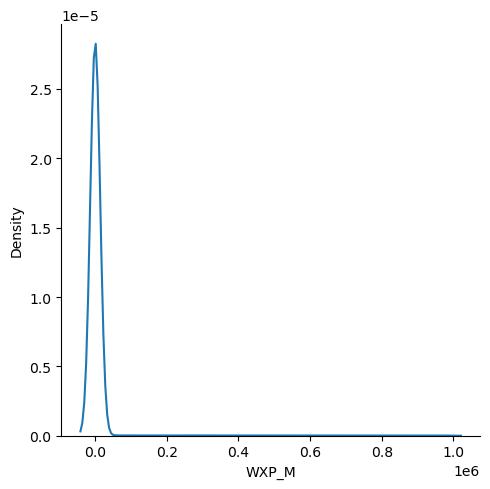

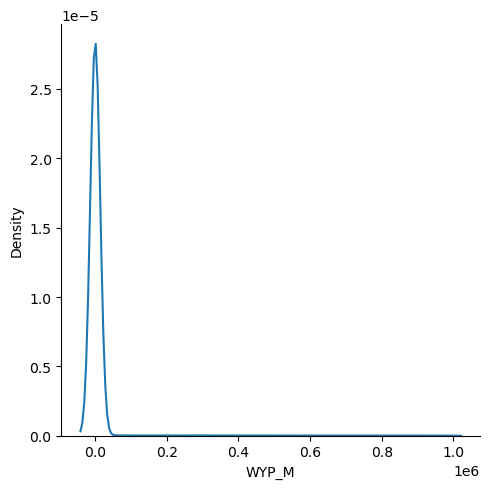

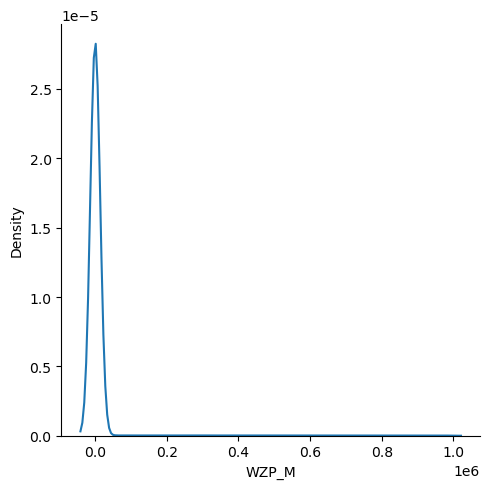

In [101]:
sns.displot(data_agg, x="WXP_M", kind="kde")
sns.displot(data_agg, x="WYP_M", kind="kde")
sns.displot(data_agg, x="WZP_M", kind="kde")

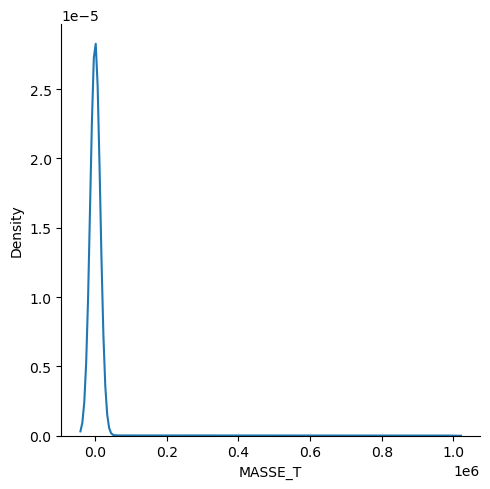

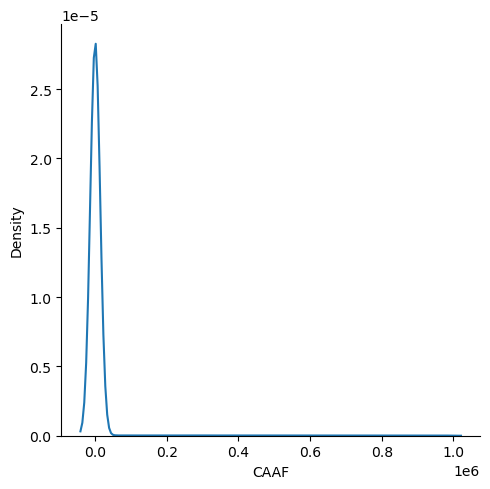

In [102]:
sns.displot(data_agg, x="MASSE_T", kind="kde")
sns.displot(data_agg, x="CAAF", kind="kde")

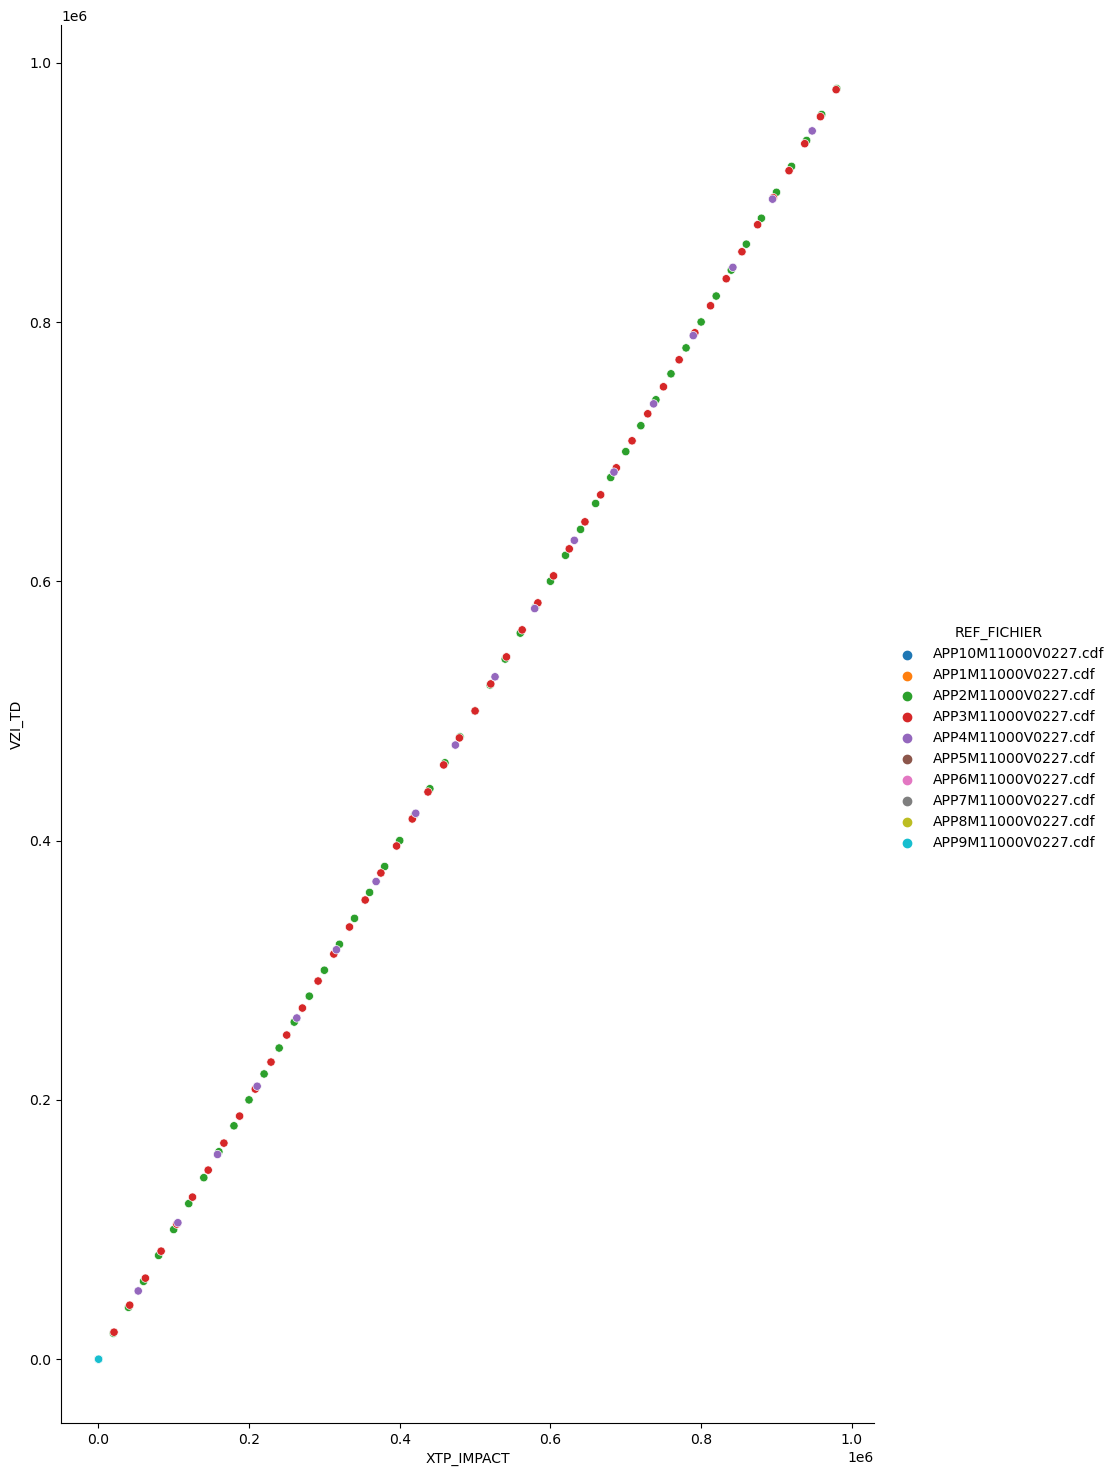

In [103]:
sns.pairplot(x_vars="XTP_IMPACT", y_vars="VZI_TD",hue='REF_FICHIER',data=data_agg,height=15, aspect=0.6)
plt.show()

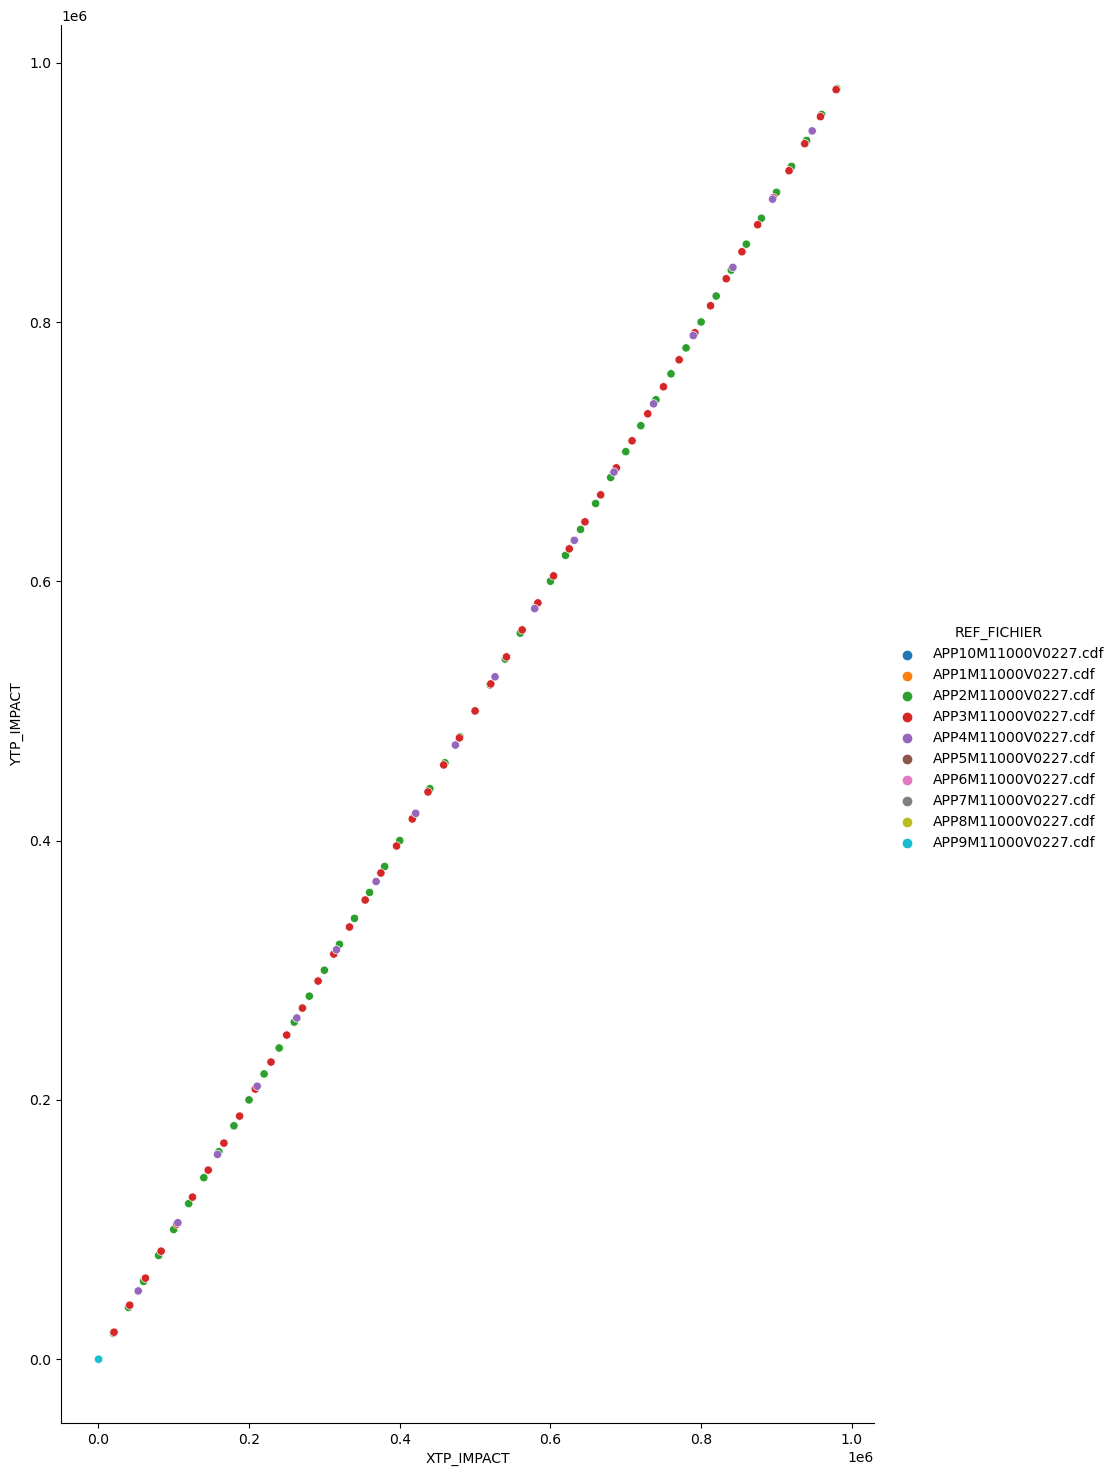

In [104]:
sns.pairplot(x_vars="XTP_IMPACT", y_vars="YTP_IMPACT",hue='REF_FICHIER',data=data_agg,height=15, aspect=0.6)
plt.show()

ValueError: Contour levels must be increasing

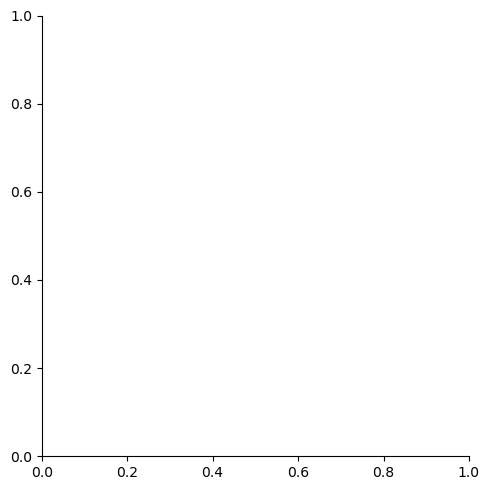

In [105]:
sns.displot(data_agg,x="XTP_IMPACT", y="YTP_IMPACT",kind='kde',thresh=5, levels=2)

In [ ]:
sns.pairplot(x_vars="MASSE_T", y_vars="CAAF",hue='REF_FICHIER',data=data_agg,height=15, aspect=0.6)
plt.show()

file_name='Compiled_data_update'    
filepath='C:/Users/to09267/Documents'
data_agg.to_csv(os.path.join(filepath, 'A321XLR', file_name + '_cdf' + '.csv'),index=False) 

In [ ]:
sns.pairplot(x_vars="MASSE_T", y_vars="ACWGT_E1C3",hue='REF_FICHIER',data=data_agg,height=15, aspect=0.6)
sns.pairplot(x_vars="CAAF", y_vars="ACCG_E1C7",hue='REF_FICHIER',data=data_agg,height=15, aspect=0.6)
plt.show()
plt.show()

In [ ]:
sns.pairplot(x_vars="MASSE_T", y_vars="CAAF",hue='REF_FICHIER',data=data_agg,height=15, aspect=0.6)
plt.show()

In [ ]:
sns.pairplot(x_vars="WXP_M", y_vars="WYP_M",hue='REF_FICHIER',data=data_agg,height=15, aspect=0.6)
plt.show()

In [ ]:
dfplot=data_agg[(data_agg.XHRA_E1C4<800)&((data_agg.XP_TP_M>-5000)&(data_agg.XP_TP_M<500))]
sns.lineplot(x="XP_TP_M", y="WXP_M",data=dfplot)
plt.show()

In [ ]:
dfplot=data_agg[(data_agg.XHRA_E1C4<800)&((data_agg.XP_TP_M>-5000)&(data_agg.XP_TP_M<500))]
sns.lineplot(x="XP_TP_M", y="PHI_E1C3",data=dfplot)
plt.show()

In [ ]:
filepath = "C:/Users/to09267/Documents/PYTHON Notebook/RWY_PROFILE"

liste_file=os.listdir(filepath)
print (liste_file)

In [ ]:
LFBO32L = pd.read_csv(os.path.join(filepath, 'LFBO32L.csv'),sep=',',header=(0))
LFBO32L["RWY"]="LFBO32L"
LFOK28 = pd.read_csv(os.path.join(filepath, 'LFOK28.csv'),sep=',',header=(0))
LFOK28["RWY"]="LFOK28"
LFRB25 = pd.read_csv(os.path.join(filepath, 'LFRB25.csv'),sep=',',header=(0))
LFRB25["RWY"]="LFRB25"

In [ ]:

sns.lineplot(x="XRWY", y="ZRWYFT",hue="RWY",data=LFBO32L,color='red')

plt.show()

In [ ]:
sns.lineplot(x="XRWY", y="ZRWYFT",hue="RWY",data=LFOK28)
plt.show()

In [106]:
sns.lineplot(x="XRWY", y="ZRWYFT",hue="RWY",data=LFRB25)
plt.show()

NameError: name 'LFRB25' is not defined

In [ ]:
#sns.pairplot(x_vars="XP_TP_M", y_vars="BRELIEF_RA1",data=df2,size=15, aspect=0.6)
dfplot=data_agg[(data_agg.XHRA_E1C4<200)&((data_agg.XP_TP_M>-500)&(data_agg.XP_TP_M<800))]
sns.pairplot(x_vars="XP_TP_M", y_vars="BRELIEF_RA1",hue='REF_FICHIER',data=dfplot,height=15, aspect=0.6)
plt.show()

In [ ]:
dfplot=data_agg[(data_agg.XHRA_E1C4<200)&((data_agg.XP_TP_M>-1000)&(data_agg.XP_TP_M<800))]
dfrwy1=LFRB25[((LFRB25.XRWY>-400)&(LFRB25.XRWY<800))]
dfrwy2=LFOK28[((LFOK28.XRWY>-400)&(LFOK28.XRWY<800))]
dfrwy3=LFBO32L[((LFBO32L.XRWY>-400)&(LFBO32L.XRWY<800))]
sns.pairplot(x_vars="XP_TP_M", y_vars="BRELIEF_RA2",hue='REF_FICHIER',data=dfplot,height=15, aspect=0.6)
sns.lineplot(x="XRWY", y="ZRWYFT",data=dfrwy1)
sns.lineplot(x="XRWY", y="ZRWYFT",data=dfrwy2)
sns.lineplot(x="XRWY", y="ZRWYFT",data=dfrwy3)
plt.show()

In [ ]:
dfplot=data_agg[(data_agg.XHRA_E1C4<200)&((data_agg.XP_TP_M>-400)&(data_agg.XP_TP_M<800))]
dfrwy=LFRB25[((LFRB25.XRWY>-400)&(LFRB25.XRWY<800))]
sns.lineplot(x="XP_TP_M", y="BRELIEF_RA2",hue='REF_FICHIER',data=dfplot)
sns.lineplot(x="XRWY", y="ZRWYFT",data=dfrwy)
plt.show()

In [ ]:
dfplot=data_agg[(data_agg.XHRA_E1C4<200)&((data_agg.XP_TP_M>-1000)&(data_agg.XP_TP_M<800))]
sns.lineplot(x="XP_TP_M", y="BRELIEF_RA1",hue='REF_FICHIER',data=dfplot,size=20)
plt.show()

In [27]:
dfplot=data_agg[(data_agg.XHRA_E1C4<200)&((data_agg.XP_TP_M>-100)&(data_agg.XP_TP_M<800))]
#dfrwy=LFBO32L[((LFBO32L.XRWY>-100)&(LFBO32L.XRWY<1500))]
dfrwy=LFRB25[((LFRB25.XRWY>-400)&(LFRB25.XRWY<800))]
#dfrwy=LFOK28[((LFOK28.XRWY>-400)&(LFOK28.XRWY<1500))]
sns.lineplot(x="XP_TP_M", y="BRELIEF_RA1",data=dfplot)
sns.lineplot(x="XP_TP_M", y="BRELIEF_RA2",data=dfplot)
sns.lineplot(x="XRWY", y="ZRWYFT",data=dfrwy)
plt.show()

NameError: name 'LFRB25' is not defined

In [28]:
#dfplot=data_agg[(data_agg.XHRA_E1C4<200)&((data_agg.XP_TP_M>-1000)&(data_agg.XP_TP_M<800))]
#sns.lineplot(x="XP_TP_M", y="BRELIEF_RA2",data=dfplot,size=20)
#plt.show()

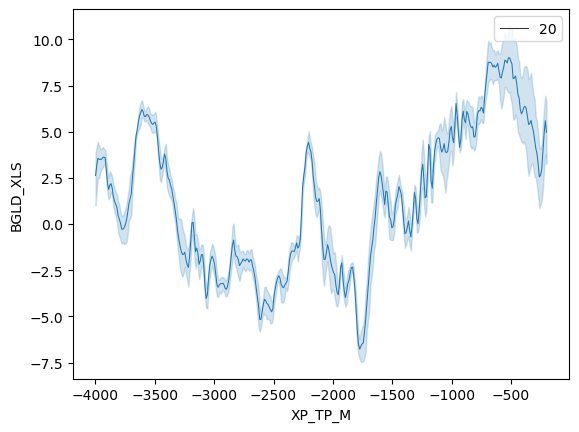

In [29]:
dfplot=data_agg[(data_agg.XHRA_E1C4<800)&((data_agg.XP_TP_M>-4000)&(data_agg.XP_TP_M<-200))]
sns.lineplot(x="XP_TP_M", y="BGLD_XLS",data=dfplot,size=20)
plt.show()

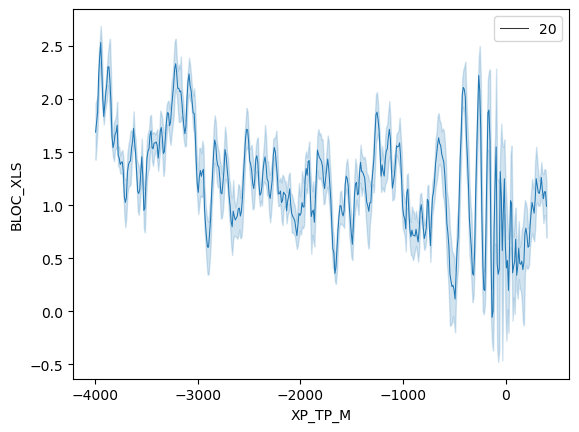

In [30]:
dfplot=data_agg[(data_agg.XHRA_E1C4<800)&((data_agg.XP_TP_M>-4000)&(data_agg.XP_TP_M<400))]
sns.lineplot(x="XP_TP_M", y="BLOC_XLS",data=dfplot,size=20)
plt.show()

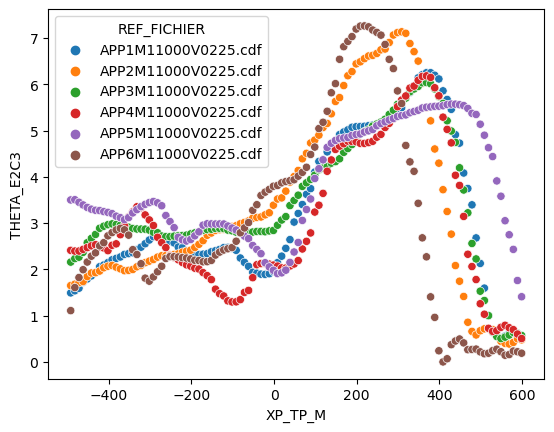

In [31]:
dfplot=data_agg[(data_agg.XHRA_E1C4<800)&((data_agg.XP_TP_M>-500)&(data_agg.XP_TP_M<600))]
sns.scatterplot(x="XP_TP_M", y="THETA_E2C3",hue='REF_FICHIER',data=dfplot)
plt.show()

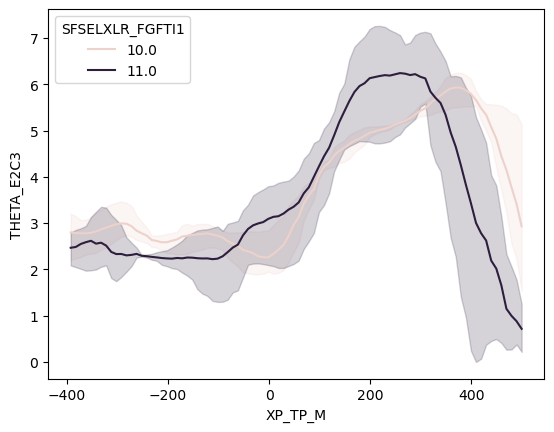

In [32]:
dfplot=data_agg[(data_agg.XHRA_E1C4<800)&((data_agg.XP_TP_M>-400)&(data_agg.XP_TP_M<500))]
sns.lineplot(x="XP_TP_M", y="THETA_E2C3",hue='SFSELXLR_FGFTI1',data=dfplot)
plt.show()

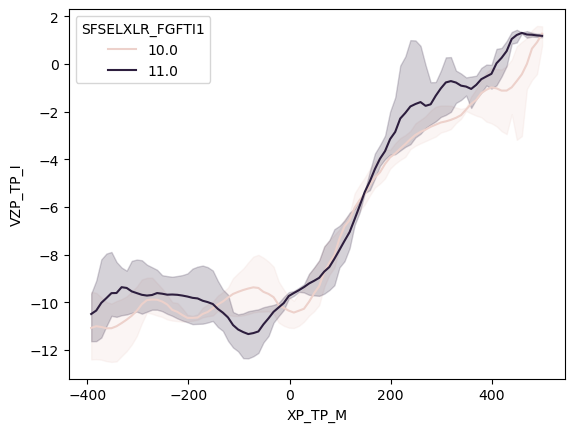

In [33]:
dfplot=data_agg[(data_agg.XHRA_E1C4<800)&((data_agg.XP_TP_M>-400)&(data_agg.XP_TP_M<500))]
sns.lineplot(x="XP_TP_M", y="VZP_TP_I",hue='SFSELXLR_FGFTI1',data=dfplot)
plt.show()

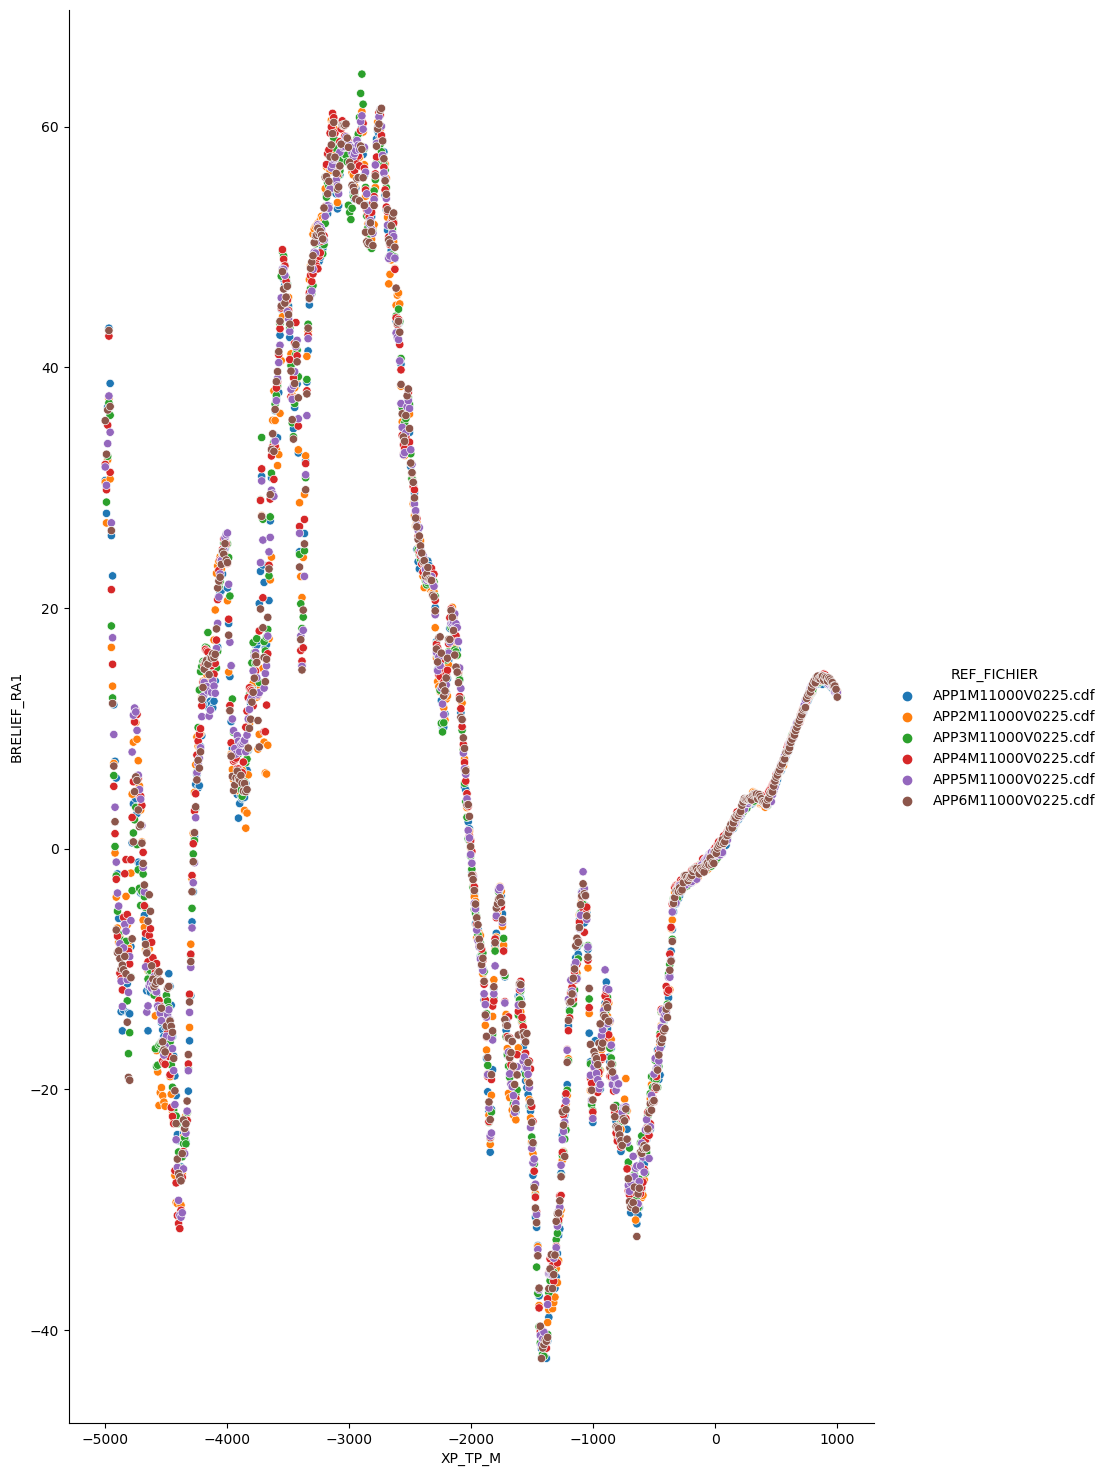

In [34]:

sns.pairplot(x_vars="XP_TP_M", y_vars="BRELIEF_RA1",hue='REF_FICHIER',data=data_agg,height=15, aspect=0.6)
plt.show()

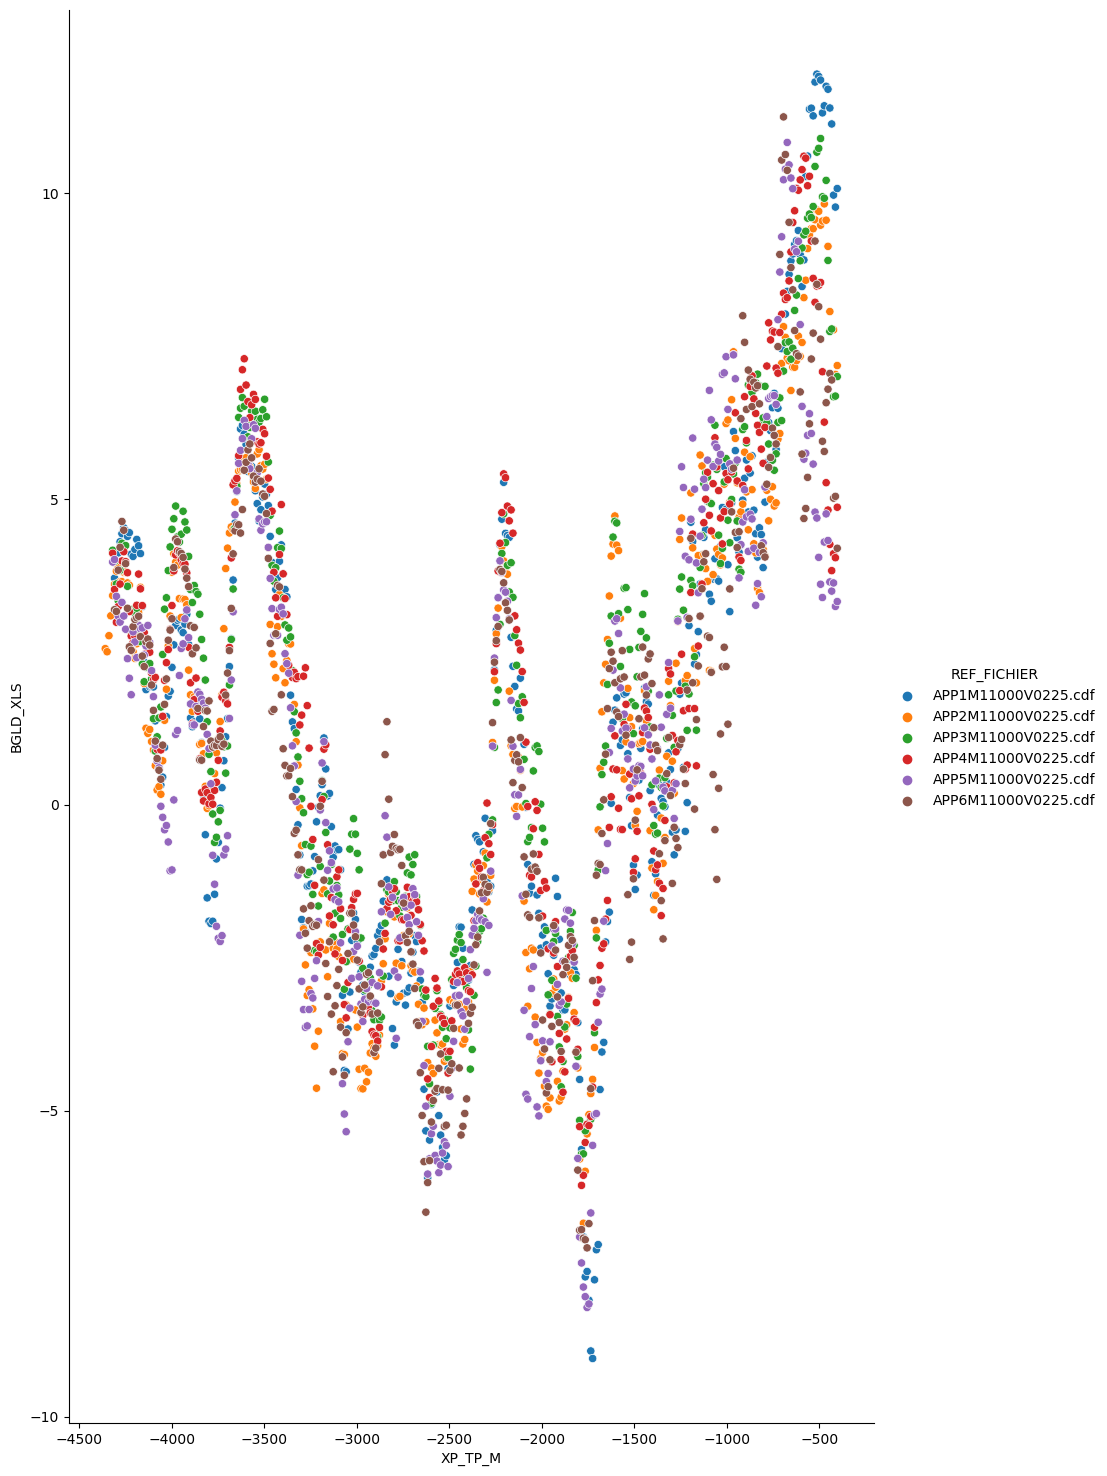

In [35]:
dfplot=data_agg[(data_agg.XHRA_E1C4<800)&((data_agg.XP_TP_M>-5000)&(data_agg.XP_TP_M<-400))]
sns.pairplot(x_vars="XP_TP_M", y_vars="BGLD_XLS",hue='REF_FICHIER',data=dfplot,height=15, aspect=0.6)
plt.show()

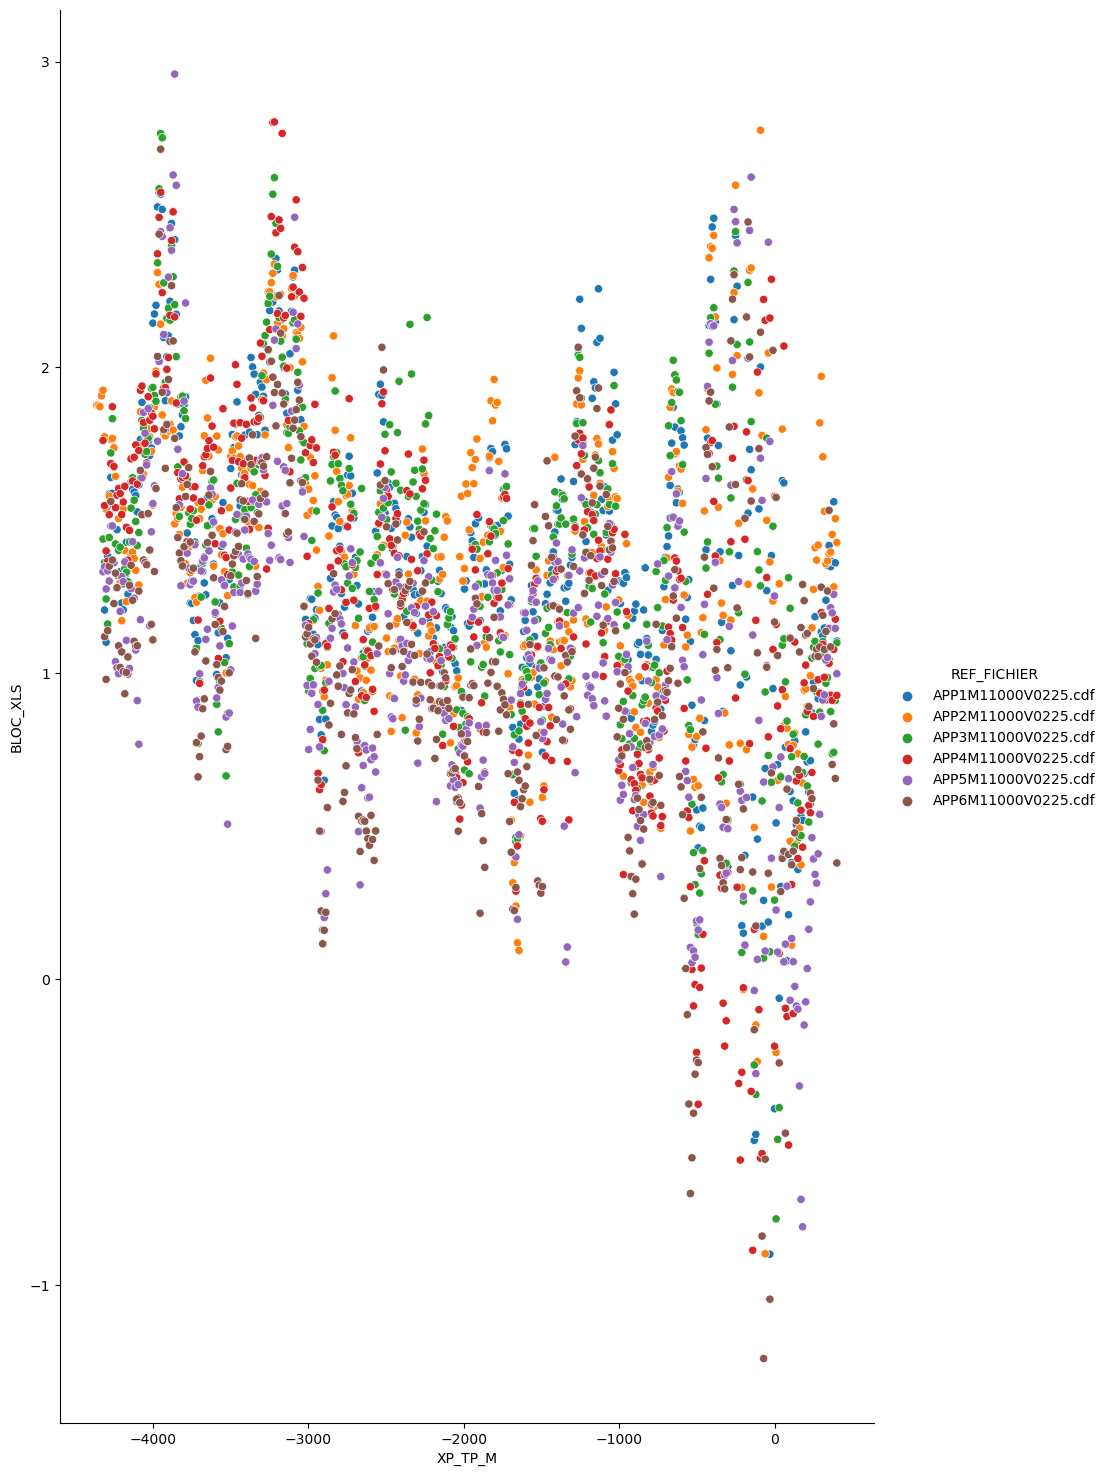

In [36]:
dfplot=data_agg[(data_agg.XHRA_E1C4<800)&((data_agg.XP_TP_M>-5000)&(data_agg.XP_TP_M<400))]
sns.pairplot(x_vars="XP_TP_M", y_vars="BLOC_XLS",hue='REF_FICHIER',data=dfplot,height=15, aspect=0.6)
plt.show()

In [37]:
print (nameliste)

['GMT', 'SYRDPC_S2C5', 'SYLDPC_S2C5', 'SXRDPC_S2C5', 'SXLDPC_S2C5', 'DPEQUISYS_E1C9', 'DQEQUISYS_E1C9', 'DREQUISYS_E1C9', 'BAPCTL_E1C8', 'BAP1CTL_E1C3', 'BAP2CTLNC_E1C4', 'BFLARECL_E1C3', 'BNOSEDOWNCL_E1C3', 'BTOGACL_E1C3', 'BSOL_E1C2', 'BXTPESTLT0_E1C3', 'BF1ENG_E1C3', 'ACWGT_E1C3', 'ACCG_E1C7', 'SFCONF_E1C3', 'WXEST_E1C3', 'ALPHAF_E1C3', '27E101513-', 'FLAPPOS_E1C3', 'PHI_E1C3', 'ZSTD_S1C4', 'P1F_E1C3', 'Q1F_E1C3', 'R1F_E1C3', 'THETA_E1C3', 'NZLAW_E1C3', 'NZEQUI_E1C3', 'NZCOM_E1C3', 'DNZCAP_E1C3', 'DNZCAPFLARE_E1C3', 'DNZCAPGS_E1C3', 'XFLARECALC_E1C8', 'HMLGESTL_E1C5', 'XHRA_E1C4', 'XHRA_E1M4', 'VZTERRAIN_E1C8', 'VZTPMEMFLARE_E1C3', 'VZESTFLARE_E1C3', 'VZFLAREC_E1C3', 'VZINERT_E1C3', 'ELEVMPOSLAW_E1C7', 'THSPOSLAW_E1C7', 'AILLORDER_E1C9', 'AILRORDER_E1C9', 'DQDERCOMPMOTNZ_E1C3', 'NY1F_E1C3', 'SSLIPESTDR_E1C7', 'DREQNOR_E1C3', 'NZRATE_E1C3', 'PHICAP_E1C3', 'NZCFLARENX_E1C3', 'PCOMAP_E1C3', 'PCOM_E1C3', 'SSLIPCAP_E1C7', 'PNEUTRAL_E1C3', 'SSLIPNEUTRAL_E1C3', 'DQDERCOMPAPFLAR_E1C3', 'ALP

In [38]:
data_agg[(data_agg.XP_TP_M>=-10) & (data_agg.XP_TP_M<=10)]

,index,GMT,REF_FICHIER,SYRDPC_S2C5,SYLDPC_S2C5,SXRDPC_S2C5,SXLDPC_S2C5,DPEQUISYS_E1C9,DQEQUISYS_E1C9,DREQUISYS_E1C9,...,27E20720C-,27E107003-,27E10700C-,27E207003-,27E20700C-,VE_TP_M,SFSELXLR_FGFTI1,SFSELXLR_FGFTI2,LOCHDGER_IMPACT,RUDPOSDEG_E1M2
3414,3574,6.429401e+06,APP1M11000V0225.cdf,-0.396483,-0.283202,-0.283202,-0.453124,-2.563714,-5.022936,-0.314208,...,0.969855,0.027113,0.025797,0.027061,0.027210,-58.917722,10.0,10.0,0.0,-1.142929
3417,3575,6.429401e+06,APP1M11000V0225.cdf,0.000000,0.000000,0.000000,0.000000,-1.743404,-4.942614,0.264404,...,0.962087,0.022577,0.020706,0.023303,0.022851,-58.916628,10.0,10.0,0.0,-0.339754
3516,3679,6.430225e+06,APP2M11000V0225.cdf,0.000000,0.000000,0.000000,0.000000,-1.592281,-3.343009,1.085691,...,1.023714,0.001173,0.001522,0.001115,0.000824,-53.095061,11.0,11.0,0.0,0.459094
3519,3680,6.430225e+06,APP2M11000V0225.cdf,0.000000,0.000000,0.000000,0.000000,-1.292314,-5.137682,1.243324,...,1.006022,-0.003161,-0.001617,-0.001971,-0.002993,-53.049549,11.0,11.0,0.0,0.699696
3166,3319,6.431024e+06,APP3M11000V0225.cdf,-0.283853,-0.283853,-0.295572,-0.283853,-0.032552,-3.334139,0.698078,...,1.006541,0.001949,-0.000290,0.001068,0.002399,-59.150645,10.0,10.0,0.0,0.373858
3169,3320,6.431025e+06,APP3M11000V0225.cdf,-0.048828,-0.048828,-0.041016,-0.041016,-0.153808,-2.676995,0.358398,...,1.033135,-0.001779,-0.000681,-0.000217,-0.000498,-59.192485,10.0,10.0,0.0,0.047310
3590,3754,6.431993e+06,APP4M11000V0225.cdf,-0.379882,-0.379882,-0.357421,-0.331054,0.960203,-2.342035,-0.368163,...,1.063703,-0.025992,-0.025345,-0.025528,-0.026329,-55.233129,11.0,11.0,0.0,-0.485462
3592,3755,6.431993e+06,APP4M11000V0225.cdf,-0.729490,-0.729490,-0.708006,-0.708006,1.287350,-3.626456,-0.677977,...,1.046726,-0.025620,-0.023378,-0.025734,-0.026220,-55.254579,11.0,11.0,0.0,-0.670308
4019,4219,6.433036e+06,APP5M11000V0225.cdf,-3.476554,-3.476554,-3.476554,-3.534171,-2.990471,-3.882558,-5.643540,...,0.930387,0.049964,0.049999,0.048998,0.050776,-57.092032,10.0,10.0,0.0,-6.109537
4022,4220,6.433036e+06,APP5M11000V0225.cdf,-2.008784,-2.008784,-2.008784,-2.008784,-3.623282,-5.934311,-4.693592,...,0.925833,0.054872,0.054815,0.055467,0.054695,-57.032557,10.0,10.0,0.0,-5.212841


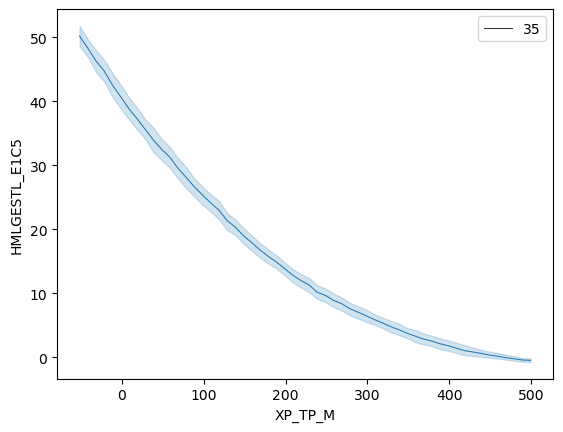

In [147]:
dfplot=data_agg[(data_agg.XP_TP_M>=-60) & (data_agg.XP_TP_M<=500)]
#sns.lineplot(x="XP_TP_M", y="HMLGEST_E1C3",data=dfplot,size=35)
sns.lineplot(x="XP_TP_M", y="HMLGESTL_E1C5",data=dfplot,size=35)

plt.show()

In [116]:
file_name='Compiled_data_220'    
filepath='C:/Users/to09267/Documents'
data_agg.to_csv(os.path.join(filepath, 'A321XLR', file_name + '_cdf' + '.csv'),index=False) 

In [117]:
sns.scatterplot(x="XP_TP_M", y="HMLGEST",hue='REF_FICHIER',data=data_agg,size=25)
plt.show()

ValueError: Could not interpret value `HMLGEST` for parameter `y`